## Instructions
Take a look at the [Linnerud dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud) in Scikit-learn. This dataset has multiple [targets](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset): 'It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club'.

In your own words, describe how to create a Regression model that would plot the relationship between the waistline and how many situps are accomplished. Do the same for the other datapoints in this dataset.


The first thing I'll do is load all the libraries and import the data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

X, y = datasets.load_linnerud(return_X_y=True)


Next I'll print out the data. For the data set, X, it should be:
\[num of chinups, num of situps, num of jumps\]

For the target set, y, is should be:
\[weight in lbs, waist in inches, and pulse in bpm\]

In [3]:
print(f"data set shape: {X.shape}")
print("[chins, situps, jumps]")
print(X[0])

print(f"\ntarget set shape: {y.shape}")
print("[weight, waist, pulse]")
print(y[0])

data set shape: (20, 3)
[chins, situps, jumps]
[  5. 162.  60.]

target set shape: (20, 3)
[weight, waist, pulse]
[191.  36.  50.]


Now we'll separate out the waistline from the target and the situps from the data. The syntax shown below creates a 2d array where each row only has one column. The syntax X[:,1] would have created a 1d array with the same info but I'm guessing the built in algos wouldn't accept it thus why we did it this way. np.newaxis is just a synonym for None to help increase the dimension of the array by one. 

In [4]:
X_situps = X[:, np.newaxis, 1]
print(X_situps.shape)
print(X_situps[0])

y_waist = y[:, None, 1]
print(y_waist.shape)
print(y_waist[0])

(20, 1)
[162.]
(20, 1)
[36.]


Now we'll split up the stripped down data into a training and test set. We're reserving 30% of the data (6 rows) to be a test or validation set. The other 14 rows will be our training data. Using linear regression, we then fit (train) the model to our data.

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_situps, y_waist, test_size=0.3)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

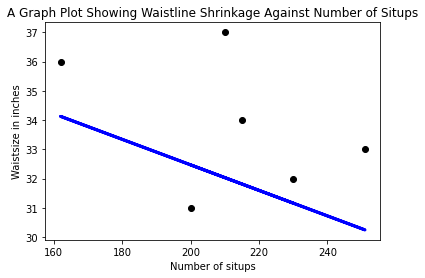

In [16]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Number of situps')
plt.ylabel('Waistsize in inches')
plt.title('A Graph Plot Showing Waistline Shrinkage Against Number of Situps')
plt.show()

Just looking at the graph, there looks to be a decent amount of variance. Let's look at some metrics to get a better idea of it all.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 7.225545639667222
RMSE: 2.688037507116897
R2: -0.6156499566957763


Our R2 value is less than 0, meaning our fit line is a worse predictor of waist size than simply drawing a line through the mean. At this point, we can pretty confidently say that the number of situps you can do is not a good predictor of your waistline.line

Let's try seeing if the number of jumps a person can do is at all indicative of their resting pulse.

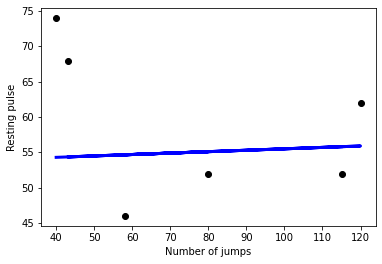

In [29]:
X_jumps = X[:, np.newaxis, 2]
y_pulse = y[:, np.newaxis, 2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_jumps, y_pulse, test_size=0.3)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Number of jumps')
plt.ylabel('Resting pulse')
#plt.title('A Graph Plot Showing Waistline Shrinkage Against Number of Situps')
plt.show()

Again there looks to be a large amount of variance. Let's look at some metrics:

In [30]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 118.43016986896697
RMSE: 10.882562651736354
R2: -0.22092958627801007


In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_pulse, test_size=0.3)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.014321841636930843
